In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

In [ ]:
'''
Version aboutie d'un code de classification avec des MLP
'''

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

In [3]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


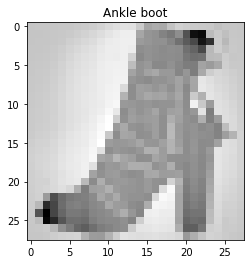

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

In [14]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.04345258 0.09042093 0.11615739 0.18047549 0.08468278 0.08449604
  0.25264293 0.02469345 0.07232066 0.05065771]] [9]


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [16]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.8818 - accuracy: 0.7125 - val_loss: 0.6257 - val_accuracy: 0.7805
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.8165 - val_loss: 0.5357 - val_accuracy: 0.8020
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8421 - val_loss: 0.5041 - val_accuracy: 0.8170
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8581 - val_loss: 0.4658 - val_accuracy: 0.8325
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8689 - val_loss: 0.4480 - val_accuracy: 0.8360
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8794 - val_loss: 0.4470 - val_accuracy: 0.8355
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8895 - val_loss: 0.4348 - val_accuracy: 0.8390
Epoch 

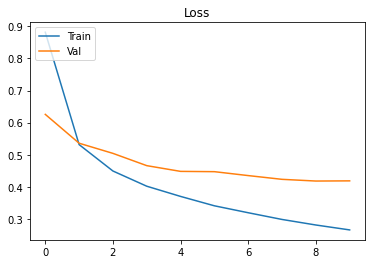

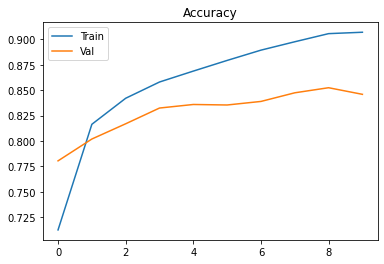

In [17]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()